In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install easyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import os
import glob

from pytesseract import Output
import pytesseract
import imutils
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
from pytesseract.pytesseract import TesseractError
import torch

%matplotlib inline
is_gpu = True if torch.cuda.is_available() else False
reader = easyocr.Reader(['pl','en'], gpu=is_gpu)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [67]:
path_books = "./books/"
path_output = "./output/"
if os.path.exists(path_books)==False:
  os.mkdir(path_books)
if os.path.exists(path_output)==False:
  os.mkdir(path_output)

In [68]:
def list_image_paths(folder_path):
    # Create a list of all files with the extensions ".jpg" and ".png"
    files = glob.glob(os.path.join(folder_path, "*.jpg")) + glob.glob(os.path.join(folder_path, "*.png"))
    print(f"Number of files: {len(files)}")

    return files

In [69]:
img_paths = list_image_paths("./books/")

Number of files: 43


In [70]:
def correct_rotation(img_path):
  img = cv2.imread(img_path)
  h, w, _ = img.shape
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  if h < w:
    new_img = imutils.rotate_bound(image, -90)
  else:
    new_img = image

  cv2.imwrite(img_path, new_img)

In [71]:
def check_upside_down(img_path):
  img = cv2.imread(img_path)
  org_img_text = reader.readtext(img)
  rotated_img = imutils.rotate_bound(img, 180)
  rotated_img_txt = reader.readtext(rotated_img)
  count_original = sum(len(element[-2])*element[-1] for element in org_img_text)
  count_rotated = sum(len(element[-2])*element[-1] for element in rotated_img_txt)


  if count_original < count_rotated:
    cv2.imwrite(img_path, rotated_img)

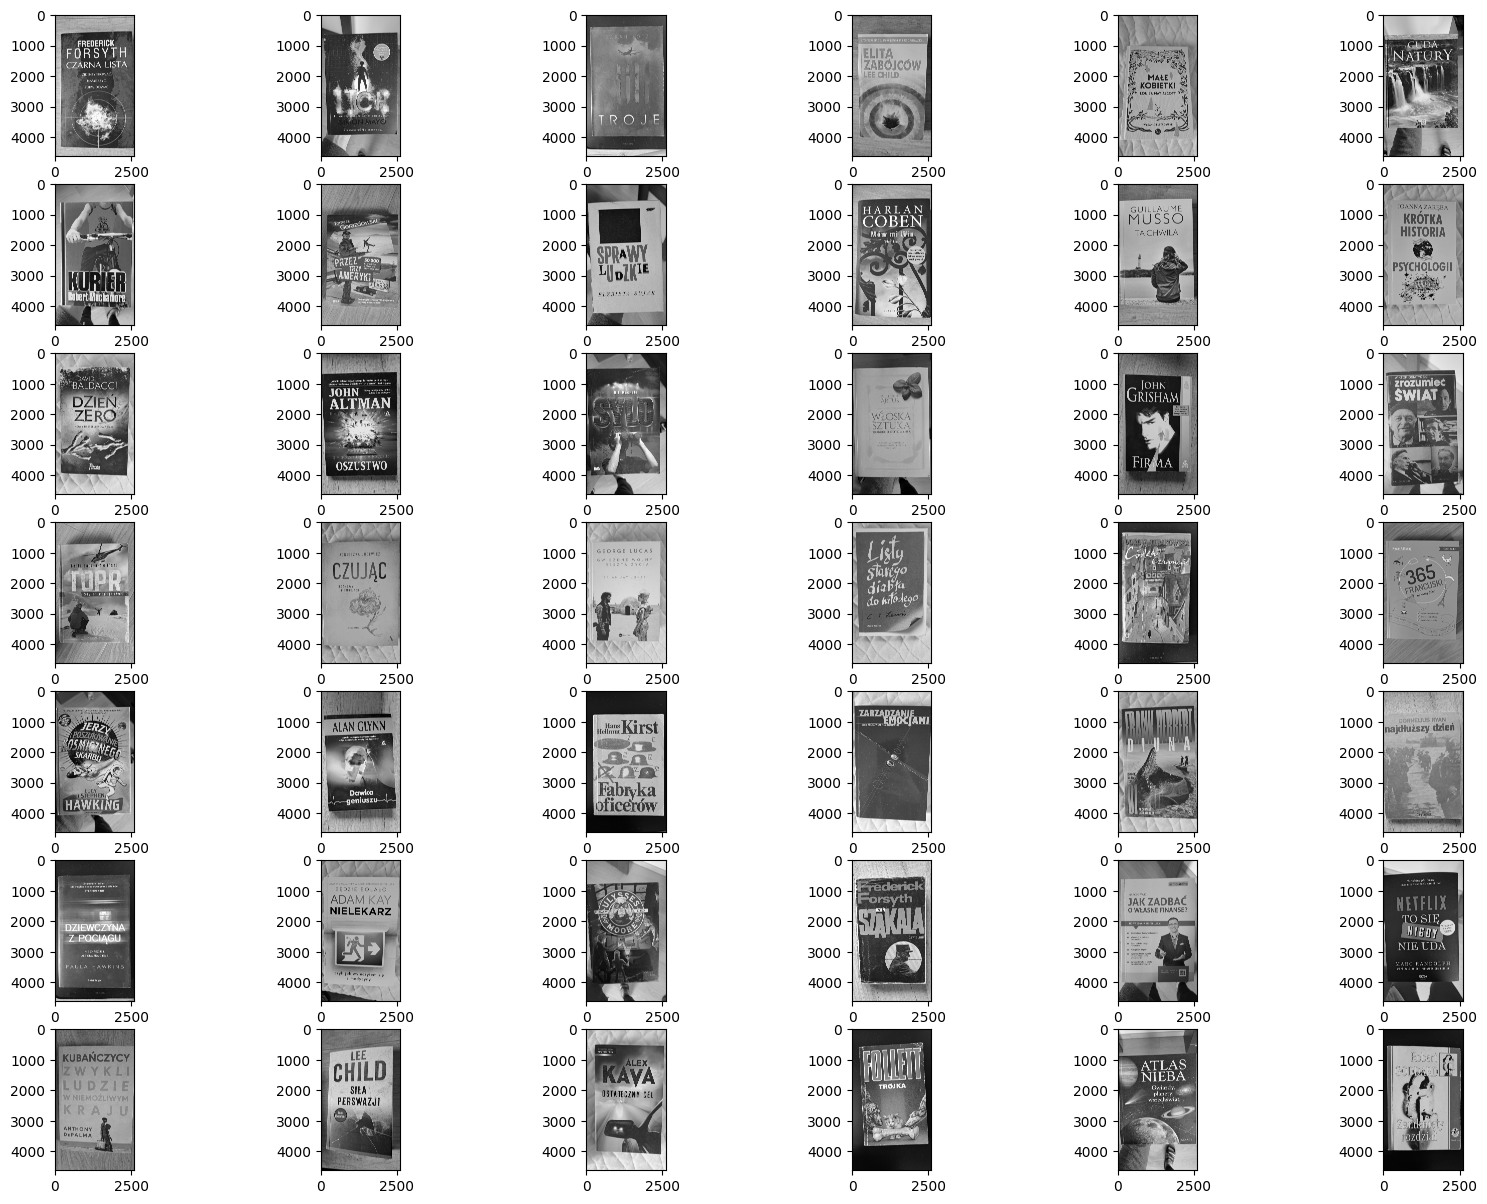

In [72]:
for img_path in img_paths:
  correct_rotation(img_path)
  check_upside_down(img_path)
  
fig = plt.figure(figsize=(20, 15))
columns = round(len(img_paths)/7)
rows = round(len(img_paths)/columns)

for i in range(1, columns*rows+1):
    img = cv2.imread(img_paths[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
#do sth with image processing

In [73]:
def recognize_text(img_path):
    return reader.readtext(img_path)

In [80]:
def overlay_ocr_text(img_path):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    # loads image
    img = cv2.imread(img_path)

    #dpi = 300
    #fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    #plt.figure()
    #f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    #axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)
    text_all = [img_path]

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            text_all.append(text)
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    #axarr[1].imshow(img)
    filename = os.path.basename(img_path)
    #.savefig(f'./output/{filename}', bbox_inches='tight')
    return text_all

In [81]:
with open("text.txt", "w") as txt_file:
  for im_path in img_paths:
    text = overlay_ocr_text(im_path)
    text_str = '.'.join(text)
    txt_file.write(text_str)
    txt_file.write("\n")


Detected text: FREDERICK (Probability: 0.88)
Detected text: FORSYTH (Probability: 1.00)
Detected text: CZARNA (Probability: 1.00)
Detected text: LISTA (Probability: 0.91)
Detected text: ZIDENTYFIKOWAĆ. (Probability: 0.65)
Detected text: NAMIERZYĆ. (Probability: 0.94)
Detected text: ZLIKWIDOWAĆ. (Probability: 0.85)
Detected text: Rh (Probability: 0.53)
Detected text: Mc (Probability: 0.99)
Detected text: Tc (Probability: 0.55)
Detected text: Ap (Probability: 0.84)
Detected text: Cd (Probability: 0.95)
Detected text: In (Probability: 1.00)
Detected text: Sn (Probability: 1.00)
Detected text: Sb (Probability: 1.00)
Detected text: Te (Probability: 0.97)
Detected text: Xe (Probability: 0.54)
Detected text: V (Probability: 0.65)
Detected text: Au (Probability: 0.98)
Detected text: Hg (Probability: 0.51)
Detected text: Pb (Probability: 0.98)
Detected text: Bi (Probability: 0.98)
Detected text: Po (Probability: 1.00)
Detected text: At (Probability: 0.99)
Detected text: Rn (Probability: 1.00)
D

KeyboardInterrupt: ignored